# 导入库

In [24]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import torch
# 配置
%matplotlib inline
%config InlineBackend.figure_format='retina' # 主题
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 25, 20
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# 读取数据集并查看数据统计


In [13]:
# 读取数据集
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Academic-paper-classification/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Academic-paper-classification/data/testA.csv')
sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Academic-paper-classification/data/submit_example_A.csv')

# 查看train前5行数据
train.head(5)

,id,title,assignee,abstract,label_id
0,538f267d2e6fba48b1286fb7f1499fe7,一种信号的发送方法及基站、用户设备,华为技术有限公司,一种信号的发送方法及基站、用户设备。在一个子帧中为多个用户设备配置的参考信号的符号和数据的符...,0
1,635a7d4b6358b6ff24a324bb871505db,一种5G通讯电缆故障监控系统,中铁二十二局集团电气化工程有限公司,本发明公开了一种5G通讯电缆故障监控系统，包括信号采样模块、补偿反馈模块，所述信号采样模块对...,0
2,aaf98d6bfe1932cf1a262812ca59d1ba,一种测试方法及电子设备,腾讯科技(北京)有限公司,本发明提供了一种测试方法及电子设备，该方法包括：基于选取的测试任务确定目标测试用例，根据所述...,0
3,ad49c9ba6412452d9b25071af702f4fb,天线方位角调节装置,武汉虹信通信技术有限责任公司,一种天线方位角调节装置，包括对向的两个8字形支架(101)、动力输入电机(102)、主动齿轮...,0
4,ffa2d7617b3eac3a1d7df01e5bb515a2,光纤老化预测方法及装置,新华三大数据技术有限公司,本申请提供一种光纤老化预测方法及装置，所述方法包括：获取待测光纤模块可接收的光信号的告警阈值...,0


In [14]:
# 查看test前5行数据
test.head(5)

,id,title,assignee,abstract
0,003fd481e65ddc070e38ae05002e16e2,一种耐磨、抗粘钢复合涂层、制备方法及应用,安徽马钢表面技术股份有限公司,本发明公开了一种耐磨、抗粘钢复合涂层、制备方法及应用，包括基体和基体上由内到外依次设置的过渡...
1,549a1cd8228bd10f18395a0625fcc70d,一种用于提高橡胶抗湿滑性的树脂的制备方法及其应用,江苏麒祥高新材料有限公司,本发明公开了一种用于提高橡胶抗湿滑性的树脂的制备方法，第一步：将R树脂和B官能团化合物进行反...
2,f09c4c0332f8966400e06f4def9f1a6d,有机硅改性丙烯酸树脂超亲水防雾涂料及其制作方法,重庆大学,本发明涉及涂料制造领域，本发明公开了一种含有磺酸季铵盐的有机硅改性丙烯酸树脂超亲水低温防雾涂...
3,06598dd8f3ab092acf2a55dce8be5621,一种空调系统及其控制方法、控制装置,海尔智家股份有限公司,本发明涉及空调领域，公开了一种空调系统，包括室外机和太阳能供热系统，所述太阳能供热系统包括：...
4,e70177ba6a54d08abecd80a60fdd9f52,资源申请、分配方法，UE及网络控制单元,中兴通讯股份有限公司,本发明实施例公开了一种资源申请方法及装置，所述方法包括：向网络控制单元发送低时延业务信息；接...


In [15]:
# 数据大小
train.shape,test.shape,sub.shape
#((958, 5), (20839, 4), (20839, 2))

((958, 5), (20839, 4), (20839, 2))

In [16]:
# 查看训练集缺失值
train.isnull().sum()
# 查看测试集缺失值
test.isnull().sum()
# 查看训练集数据信息
train.info()
# 查看测试集数据信息
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        958 non-null    object
 1   title     958 non-null    object
 2   assignee  958 non-null    object
 3   abstract  958 non-null    object
 4   label_id  958 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 37.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20839 entries, 0 to 20838
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        20839 non-null  object
 1   title     20839 non-null  object
 2   assignee  20839 non-null  object
 3   abstract  20839 non-null  object
dtypes: object(4)
memory usage: 651.3+ KB


In [17]:
# 查看数据集中间有无空行
print("train null nums")
print(train.shape[0]-train.count())
print("test null nums")
print(test.shape[0]-test.count())

train null nums
id          0
title       0
assignee    0
abstract    0
label_id    0
dtype: int64
test null nums
id          0
title       0
assignee    0
abstract    0
dtype: int64


## 查看标签分布情况

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'label_id count')

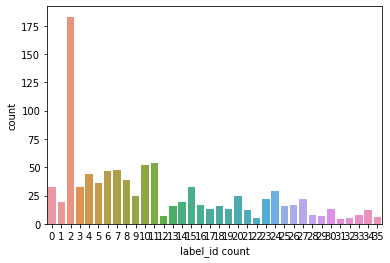

In [22]:
train['label_id'].value_counts()
# 标签类别数 36
len(train['label_id'].value_counts())
# 绘制直方图
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(train.label_id)
plt.xlabel('label_id count')
# 数据分布不均衡

## 查看title与abstract字数分布情况

In [25]:
# 拼接title与abstract
train['text']=train['title']+' '+train['abstract']
test['text']=test['title']+' '+test['abstract']

In [26]:
train['text_len']=train['text'].map(len)
train['text'].map(len).describe()

count    958.000000
mean     271.516701
std       53.198955
min       71.000000
25%      246.000000
50%      289.000000
75%      307.000000
max      649.000000
Name: text, dtype: float64

In [27]:
test['text'].map(len).describe()

count    20839.000000
mean       269.374922
std         55.918268
min         25.000000
25%        237.000000
50%        286.000000
75%        308.000000
max       1332.000000
Name: text, dtype: float64

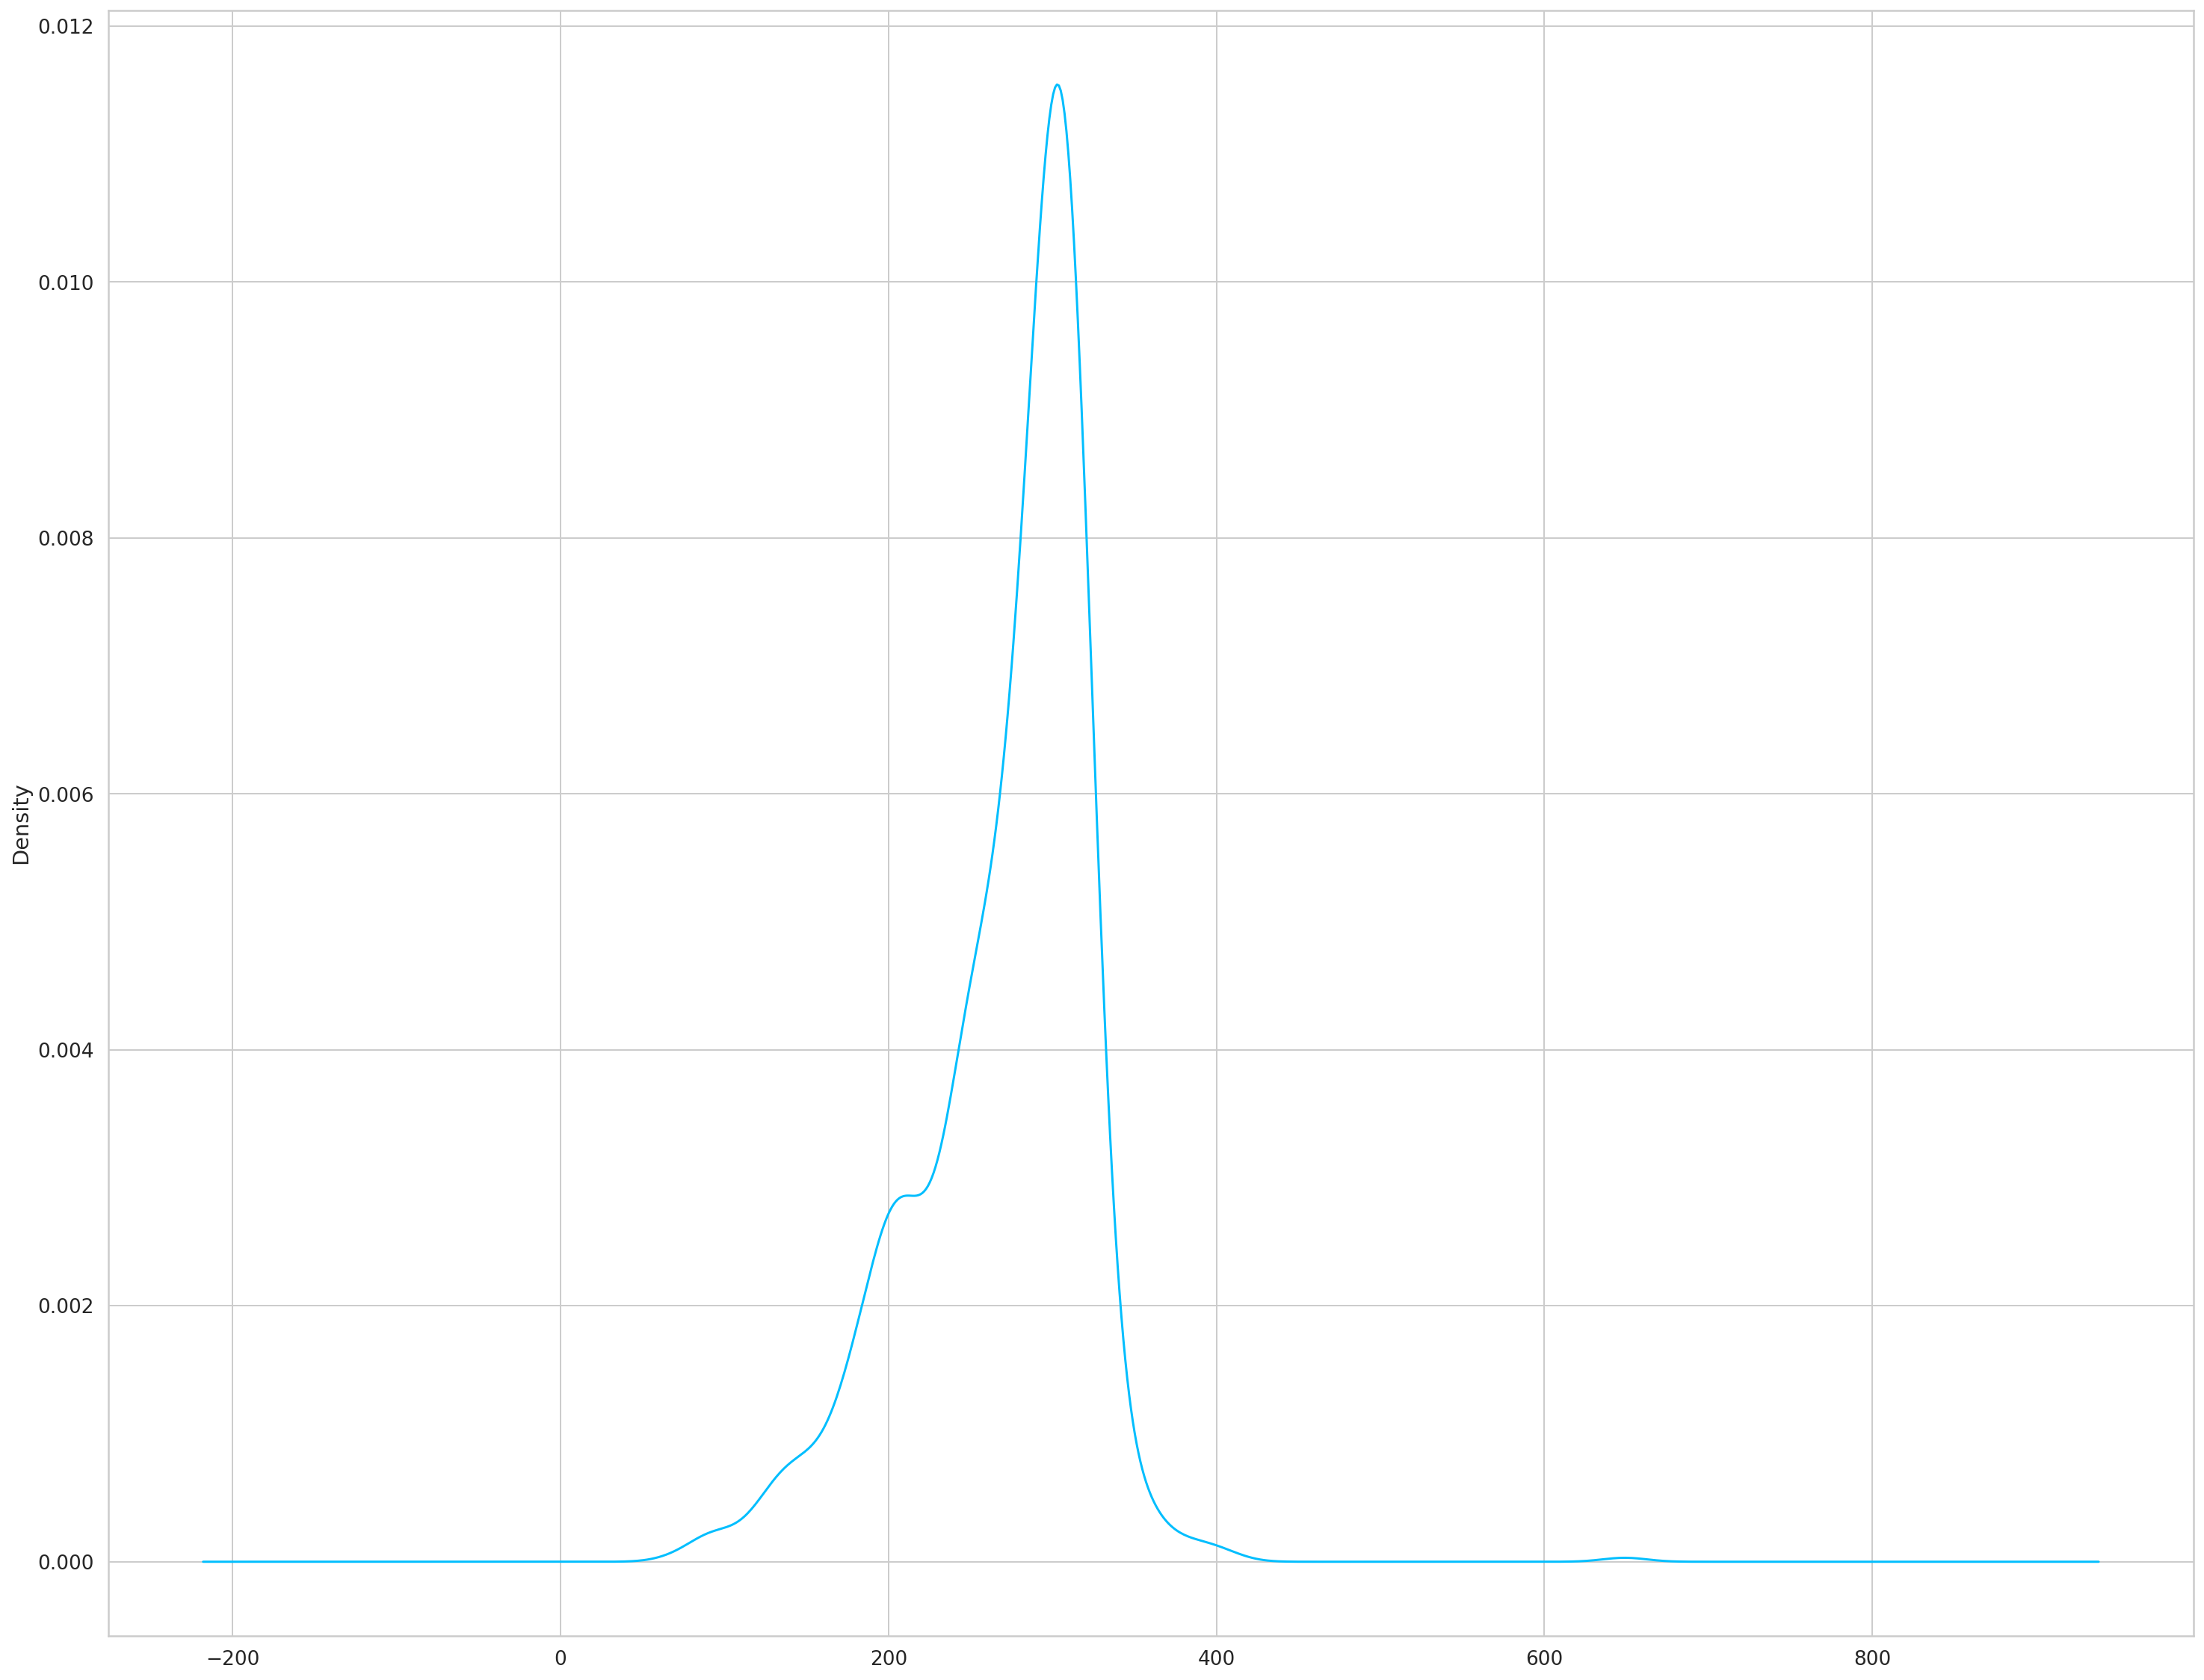

In [28]:
train['text_len'].plot(kind='kde')